In [1387]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [1388]:
iris = pd.read_csv("iris.csv")
iris["species"] = iris["species"].apply(lambda x: x[5:])
set(iris['species'])

{'setosa', 'versicolor', 'virginica'}

####  Create three differents ones

In [1389]:
for i in set(df["species"]):
    df[f"type_{i}"] = df["species"].apply(lambda x: 0 if x != i else 1)

In [1390]:
# create the binary classifier for Iris Setosa
from sklearn.pipeline import make_pipeline
type_clf = make_pipeline(LinearSVC())

In [1391]:
df

,petal_length,petal_width,species,type_setosa,type_virginica,type_versicolor
0,1.4,0.2,setosa,1,0,0
1,1.4,0.2,setosa,1,0,0
2,1.3,0.2,setosa,1,0,0
3,1.5,0.2,setosa,1,0,0
4,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...
145,5.2,2.3,virginica,0,1,0
146,5.0,1.9,virginica,0,1,0
147,5.2,2.0,virginica,0,1,0
148,5.4,2.3,virginica,0,1,0


## Setosa

In [1392]:
X = df[["petal_length", "petal_width"]]
y = df['type_setosa']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# train the model
type_clf.fit(X_train, y_train)

# Make a prediction on the test set
y_pred_setosa = type_clf.predict(X_test)


#### Plot the decision boundaries

In [1393]:
# Plot the decision boundaries
X = X_test  # use the testing set for plotting
X = X.to_numpy()

x0_min, x0_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                       np.linspace(x1_min, x1_max, 1000))
X_new = np.c_[xx0.ravel(), xx1.ravel()]
y_predict = type_clf.predict(X_new)
zz = y_predict.reshape(xx0.shape)

/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


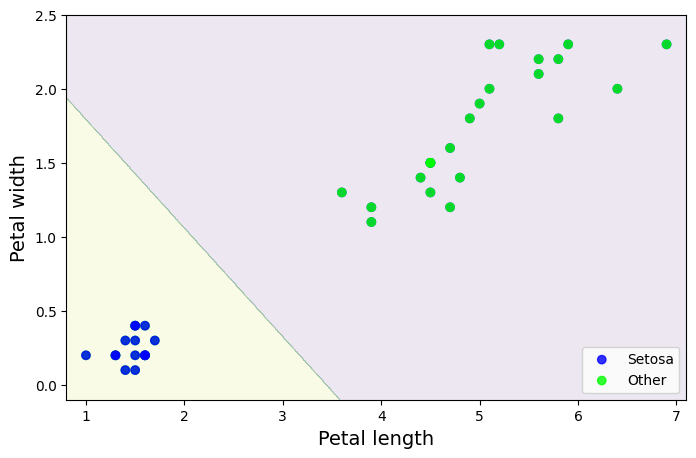

In [1394]:
plt.figure(figsize=(8, 5))
plt.contourf(xx0, xx1, zz, linestyles='-', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y_test,
            cmap=plt.cm.brg, label='Setosa', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=(y_test == 0),
            cmap=plt.cm.brg, label='Other', alpha=0.8)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([x0_min, x0_max, x1_min, x1_max])
plt.legend(loc='lower right')
plt.show()


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


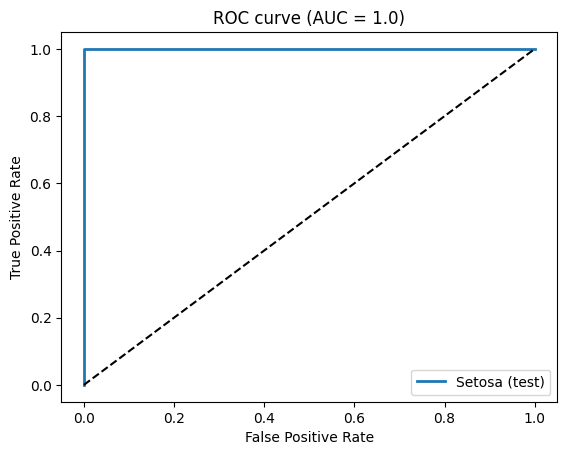

In [1395]:

# Display performance indicators of the model for the test set
y_scores_setosa_test = type_clf.decision_function(X)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_setosa_test)
plt.plot(fpr_test, tpr_test, linewidth=2, label="Setosa (test)")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (AUC = {roc_auc_score(y_test, y_scores_setosa_test)})')
plt.legend()
plt.show()


In [1396]:
print('Precision Score: \n', precision_score(y_test, y_pred_setosa))
print('Recall Score: \n', recall_score(y_test, y_pred_setosa))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred_setosa))
print('ROC AUC Score: \n', roc_auc_score(y_test, y_scores_setosa_test))


Precision Score: 
 1.0
Recall Score: 
 1.0
Confusion Matrix :
 [[23  0]
 [ 0 15]]
ROC AUC Score: 
 1.0


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


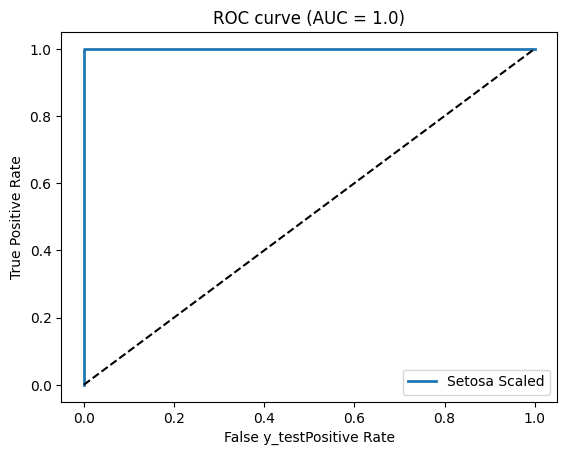

In [1397]:
# standardize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_tr = scaler.transform(X_test)

# create a new binary classifier for Iris Setosa using standardized data
setosa_clf_scaled = make_pipeline(LinearSVC(random_state=42))

# train the model
setosa_clf_scaled.fit(X_scaled, y_test)
X_test = scaler.transform(X_test)

# predict using the trained model
y_pred_setosa_scaled = setosa_clf_scaled.predict(X_test_tr)

# display performance indicators of the scaled model
y_scores_setosa_scaled = setosa_clf_scaled.decision_function(X_test_tr)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_setosa_scaled)
plt.plot(fpr, tpr, linewidth=2, label="Setosa Scaled")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False y_testPositive Rate")
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (AUC = {roc_auc_score(y_test, y_scores_setosa_scaled)})')
plt.legend()
plt.show()

#### Standardize the dataset

In [1398]:
print('Precision Score:', precision_score(y_test, y_pred_setosa_scaled))
print('Recall Score:', recall_score(y_test, y_pred_setosa_scaled))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_setosa_scaled))
print('ROC AUC Score:', roc_auc_score(
    y_test, y_scores_setosa_scaled))


Precision Score: 1.0
Recall Score: 1.0
Confusion Matrix: [[23  0]
 [ 0 15]]
ROC AUC Score: 1.0


In [1399]:
from sklearn.model_selection import GridSearchCV

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

# create the binary classifier
type_clf = LinearSVC(random_state=42)

# define the parameter grid for C
param_grid = {'C': [0.01, 0.1, 1, 10, 50, 100, 1000]}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(type_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_scaled, y_test)

# train the model
type_clf.fit(X_scaled, y_test)

# predict using the trained model
y_pred = type_clf.predict(X_test)

# print the best parameter and the corresponding score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# display the performance indicators of your model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print()


Best parameter:  {'C': 0.01}
Best score:  1.0
Confusion Matrix:
 [[23  0]
 [ 0 15]]
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 1.0



## Versicolor

In [1400]:
type_clf = make_pipeline(LinearSVC(random_state=42))

X = df[["petal_length", "petal_width"]]
y = df['type_versicolor']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# train the model
type_clf.fit(X_train, y_train)

# Make a prediction on the test set
y_pred_versicolor = type_clf.predict(X_test)


#### Plot the decision boundaries

In [1401]:
# Plot the decision boundaries
X = X_test  # use the testing set for plotting
X = X.to_numpy()

x0_min, x0_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                       np.linspace(x1_min, x1_max, 1000))
X_new = np.c_[xx0.ravel(), xx1.ravel()]
y_predict = type_clf.predict(X_new)
zz = y_predict.reshape(xx0.shape)


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


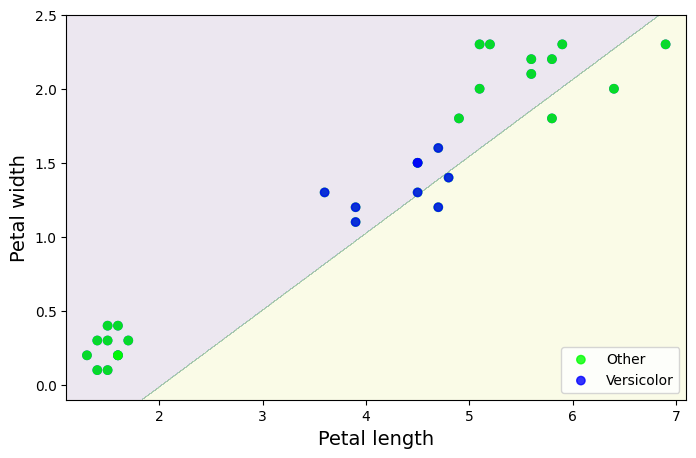

In [1402]:
plt.figure(figsize=(8, 5))
plt.contourf(xx0, xx1, zz,  linestyles='-', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y_test,
            cmap=plt.cm.brg, label='Other', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=(y_test == 0),
            cmap=plt.cm.brg, label='Versicolor', alpha=0.8)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([x0_min, x0_max, x1_min, x1_max])
plt.legend(loc='lower right')
plt.show()

/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


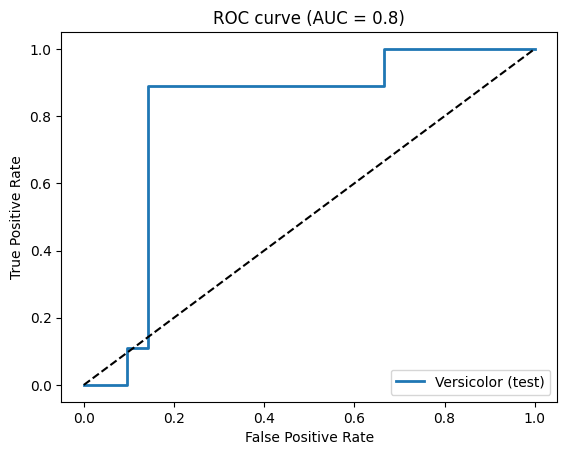

In [1403]:
# Display performance indicators of the model for the test set
y_scores_versicolor_test = type_clf.decision_function(X)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_versicolor_test)
plt.plot(fpr_test, tpr_test, linewidth=2, label="Versicolor (test)")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(
    f'ROC curve (AUC = {round(roc_auc_score(y_test, y_scores_versicolor_test),2)})')
plt.legend(loc = 'lower right')
plt.show()


In [1404]:
print('Precision Score: \n', precision_score(y_test, y_pred_versicolor))
print('Recall Score: \n', recall_score(y_test, y_pred_versicolor))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred_versicolor))
print('ROC AUC Score: \n', roc_auc_score(y_test, y_scores_versicolor_test))


Precision Score: 
 0.4
Recall Score: 
 0.2222222222222222
Confusion Matrix :
 [[18  3]
 [ 7  2]]
ROC AUC Score: 
 0.8042328042328042


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


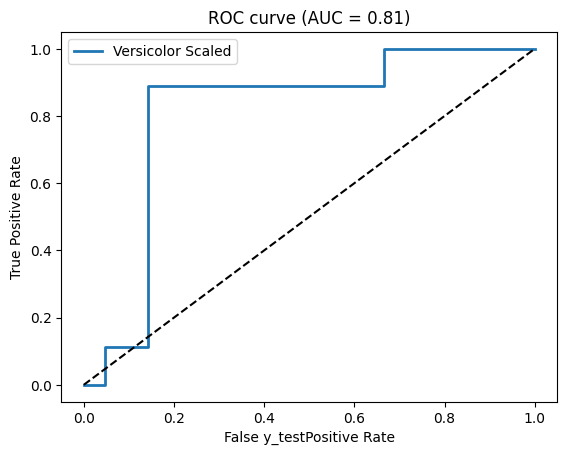

In [1405]:
# standardize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_tr = scaler.transform(X_test)

# create a new binary classifier for Iris StandardScaler(),versicolor using standardized data
versicolor_clf_scaled = make_pipeline(LinearSVC(random_state=42))

# train the model
versicolor_clf_scaled.fit(X_scaled, y_test)

# predict using the trained model
y_pred_versicolor_scaled = versicolor_clf_scaled.predict(X_test_tr)

# display performance indicators of the scaled model
y_scores_versicolor_scaled = versicolor_clf_scaled.decision_function(X_test_tr)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_versicolor_scaled)
plt.plot(fpr,    tpr, linewidth=2, label="Versicolor Scaled")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False y_testPositive Rate")
plt.ylabel('True Positive Rate')
plt.title(
    f'ROC curve (AUC = {round(roc_auc_score(y_test, y_scores_versicolor_scaled),2)})')
plt.legend()
plt.show()


#### Standardize the dataset

In [1406]:
print('Precision Score:', precision_score(y_test, y_pred_versicolor_scaled))
print('Recall Score:', recall_score(y_test, y_pred_versicolor_scaled))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_versicolor_scaled))
print('ROC AUC Score:', roc_auc_score(
    y_test, y_scores_versicolor_scaled))


Precision Score: 0.25
Recall Score: 0.1111111111111111
Confusion Matrix: [[18  3]
 [ 8  1]]
ROC AUC Score: 0.8095238095238095


In [1407]:
from sklearn.model_selection import GridSearchCV

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)


# create the binary classifier
type_clf = LinearSVC(random_state=42)

# define the parameter grid for C
param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 50, 100, 1000]}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(type_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_scaled, y_test)

# train the model
type_clf.fit(X_scaled, y_test)

# predict using the trained model
y_pred = type_clf.predict(X_test)

# print the best parameter and the corresponding score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# display the performance indicators of your model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print()


Best parameter:  {'C': 100}
Best score:  0.7333333333333333
Confusion Matrix:
 [[18  3]
 [ 8  1]]
Precision Score: 0.25
Recall Score: 0.1111111111111111
ROC AUC Score: 0.4841269841269842



/home/triomphant/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: Convergenc

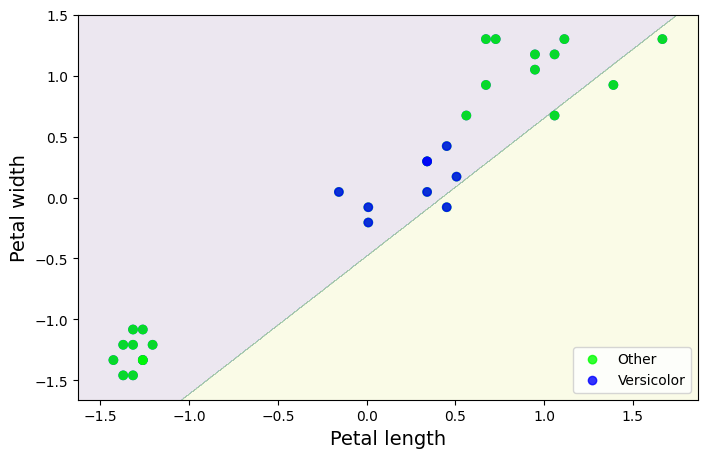

In [1408]:
# Plot the decision boundaries
X = X_test_tr  # use the testing set for plotting

x0_min, x0_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                       np.linspace(x1_min, x1_max, 1000))
X_new = np.c_[xx0.ravel(), xx1.ravel()]
y_predict = type_clf.predict(X_new)
zz = y_predict.reshape(xx0.shape)
plt.figure(figsize=(8, 5))
plt.contourf(xx0, xx1, zz,  linestyles='-', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y_test,
            cmap=plt.cm.brg, label='Other', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=(y_test == 0),
            cmap=plt.cm.brg, label='Versicolor', alpha=0.8)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([x0_min, x0_max, x1_min, x1_max])
plt.legend(loc='lower right')
plt.show()


## Virginica

In [1409]:
type_clf = make_pipeline( LinearSVC())

X = df[["petal_length", "petal_width"]]
y = df['type_virginica']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# train the model
type_clf.fit(X_train, y_train)

# Make a prediction on the test set
y_pred_virginica = type_clf.predict(X_test)


#### Plot the decision boundaries

In [1410]:
# Plot the decision boundaries
X = X_test  # use the testing set for plotting
X = X.to_numpy()

x0_min, x0_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                       np.linspace(x1_min, x1_max, 1000))
X_new = np.c_[xx0.ravel(), xx1.ravel()]
y_predict = type_clf.predict(X_new)
zz = y_predict.reshape(xx0.shape)


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


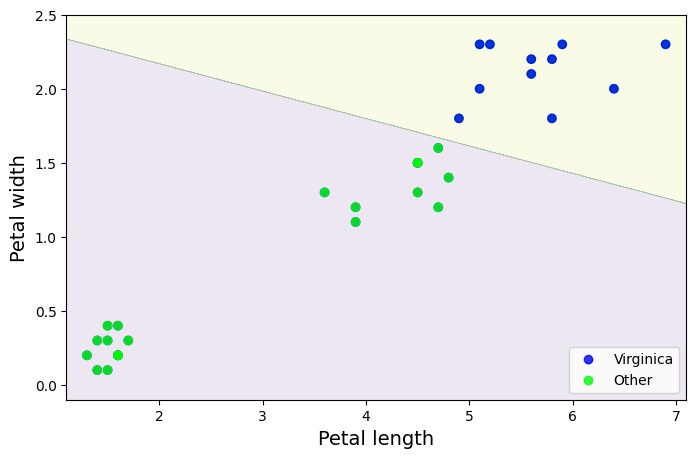

In [1411]:
plt.figure(figsize=(8, 5))
plt.contourf(xx0, xx1, zz,  linestyles='-', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y_test,
            cmap=plt.cm.brg, label='Virginica', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=(y_test == 0),
            cmap=plt.cm.brg, label='Other', alpha=0.8)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([x0_min, x0_max, x1_min, x1_max])
plt.legend(loc='lower right')
plt.show()


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


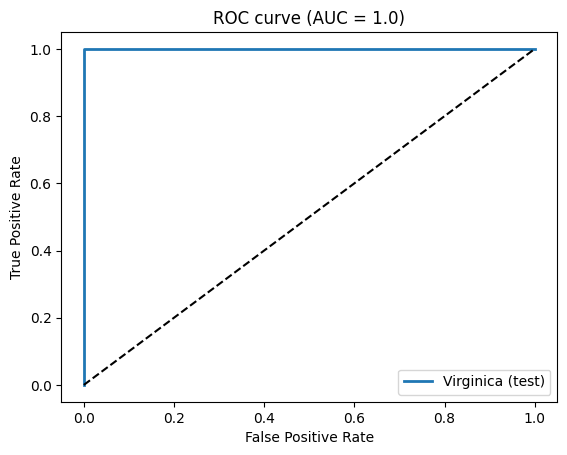

In [1412]:
# Display performance indicators of the model for the test set
y_scores_virginica_test = type_clf.decision_function(X)
fpr_test, tpr_test, thresholds_test = roc_curve(
    y_test, y_scores_virginica_test)
plt.plot(fpr_test, tpr_test, linewidth=2, label="Virginica (test)")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(
    f'ROC curve (AUC = {round(roc_auc_score(y_test, y_scores_virginica_test),2)})')
plt.legend(loc='lower right')
plt.show()


In [1413]:
print('Precision Score: \n', precision_score(y_test, y_pred_virginica))
print('Recall Score: \n', recall_score(y_test, y_pred_virginica))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred_virginica))
print('ROC AUC Score: \n', roc_auc_score(y_test, y_scores_virginica_test))


Precision Score: 
 1.0
Recall Score: 
 1.0
Confusion Matrix :
 [[19  0]
 [ 0 11]]
ROC AUC Score: 
 1.0


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


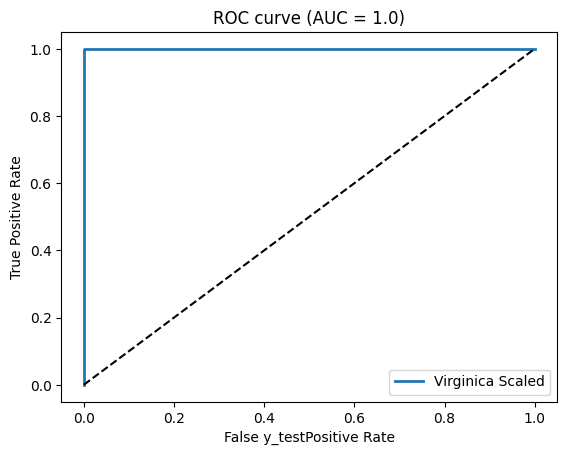

In [1414]:
# standardize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_tr = scaler.transform(X_test)

# create a new binary classifier for Iris StandardScaler(),virginica using standardized data
virginica_clf_scaled = make_pipeline(LinearSVC(random_state=42))

# train the model
virginica_clf_scaled.fit(X_scaled, y_test)

# predict using the trained model
y_pred_virginica_scaled = virginica_clf_scaled.predict(X_test_tr)

# display performance indicators of the scaled model
y_scores_virginica_scaled = virginica_clf_scaled.decision_function(X_test_tr)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_virginica_scaled)
plt.plot(fpr, tpr, linewidth=2, label="Virginica Scaled")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False y_testPositive Rate")
plt.ylabel('True Positive Rate')
plt.title(
    f'ROC curve (AUC = {round(roc_auc_score(y_test, y_pred_virginica_scaled),2)})')
plt.legend()
plt.show()


In [1415]:
print('Precision Score:', precision_score(y_test, y_pred_virginica_scaled))
print('Recall Score:', recall_score(y_test, y_pred_virginica_scaled))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_virginica_scaled))
print('ROC AUC Score:', roc_auc_score(y_test, y_scores_virginica_scaled))


Precision Score: 1.0
Recall Score: 1.0
Confusion Matrix: [[19  0]
 [ 0 11]]
ROC AUC Score: 1.0


In [1416]:
from sklearn.model_selection import GridSearchCV

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# create the binary classifier
type_clf = LinearSVC(random_state=42)

# define the parameter grid for C
param_grid = {'C': [0.01, 0.1, 1, 10, 50, 100]}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(type_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_scaled, y_test)

# train the model
type_clf.fit(X_scaled, y_test)

# predict using the trained model
y_pred = type_clf.predict(X_test)

# print the best parameter and the corresponding score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# display the performance indicators of your model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print()

Best parameter:  {'C': 1}
Best score:  1.0
Confusion Matrix:
 [[19  0]
 [ 0 11]]
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 1.0



/home/triomphant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
